<a href="https://colab.research.google.com/github/Shruti-GiriK/Projects/blob/main/Project_heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Patients Information Dataset**   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

---
  **About this Dataset** **
---
This Dataset contains information which covers Demographics like Age, State; Medical data like BMI,Vaccination Status, Physical Difficulties,Lifestyle Habits and Past Medical Issues like Asthma,Disease,Arthritis.

# **Problem Statement**
---
Prediction
---
Using HadHeartAttack as the variable, the problem will be to predict if a person had suffered from an heart attack. With the values being 0 and 1, we can approach a Binary Classification solution to predict the likelihood of HadHeartAttack.

Heart disease is one of the leading causes of mortality worldwide, with heart attacks being a primary manifestation. Early detection and intervention can significantly reduce the risk and improve patient outcomes. In this project, we aim to develop a predictive model that leverages patient demographic, health, and lifestyle information to determine the likelihood of a heart attack occurrence. By analyzing this data, healthcare providers may gain insights into high-risk patients, enabling proactive measures and better allocation of medical resources.

The objective is to predict whether a patient has had a heart attack (binary outcome: HadHeartAttack) based on a range of features, including medical history, lifestyle habits, and demographic details. This model could serve as an assistive tool in clinical decision-making and help in implementing preventive healthcare strategies.

# **Column Description**
---
An overview of the dataset with description of the values in each column.
---
1. **PatientID**: Unique identifier for each patient.
2. **State**: U.S. state where the patient resides.
3. **Sex**: Patient’s gender (e.g., Male, Female).
4. **GeneralHealth**: Self-reported health status (e.g., Excellent, Very good, Good, Fair, Poor).
5. **AgeCategory**: Age range of the patient (e.g., Age 65 to 69, Age 50 to 54).
6. **HeightInMeters**: Patient’s height in meters.
7. **WeightInKilograms**: Patient’s weight in kilograms.
8. **BMI**: Body Mass Index, calculated based on height and weight.
9. **HadHeartAttack**: Target variable indicating if the patient has had a heart attack (`1` for Yes, `0` for No).
10. **HadAngina**: Indicates if the patient has had angina (chest pain caused by reduced blood flow to the heart) (`1` for Yes, `0` for No).
11. **HadStroke**: Indicates if the patient has had a stroke (`1` for Yes, `0` for No).
12. **HadAsthma**: Indicates if the patient has had asthma (`1` for Yes, `0` for No).
13. **HadSkinCancer**: Indicates if the patient has had skin cancer (`1` for Yes, `0` for No).
14. **HadCOPD**: Indicates if the patient has had chronic obstructive pulmonary disease (COPD) (`1` for Yes, `0` for No).
15. **HadDepressiveDisorder**: Indicates if the patient has had a depressive disorder (`1` for Yes, `0` for No).
16. **HadKidneyDisease**: Indicates if the patient has had kidney disease (`1` for Yes, `0` for No).
17. **HadArthritis**: Indicates if the patient has had arthritis (`1` for Yes, `0` for No).
18. **HadDiabetes**: Indicates if the patient has had diabetes. This feature may include categorical values indicating the type or status of diabetes.
19. **DeafOrHardOfHearing**: Indicates if the patient is deaf or hard of hearing (`1` for Yes, `0` for No).
20. **BlindOrVisionDifficulty**: Indicates if the patient has blindness or vision difficulty (`1` for Yes, `0` for No).
21. **DifficultyConcentrating**: Indicates if the patient has difficulty concentrating (`1` for Yes, `0` for No).
22. **DifficultyWalking**: Indicates if the patient has difficulty walking (`1` for Yes, `0` for No).
23. **DifficultyDressingBathing**: Indicates if the patient has difficulty dressing or bathing (`1` for Yes, `0` for No).
24. **DifficultyErrands**: Indicates if the patient has difficulty running errands alone (`1` for Yes, `0` for No).
25. **SmokerStatus**: Indicates the patient’s smoking status (e.g., Current smoker, Former smoker, Never smoked).
26. **ECigaretteUsage**: Indicates the patient’s e-cigarette usage status (e.g., Never used, Former user, Current user).
27. **ChestScan**: Indicates if the patient has had a chest scan (`1` for Yes, `0` for No).
28. **RaceEthnicityCategory**: Patient’s race/ethnicity category (e.g., White, Non-Hispanic; Black, Non-Hispanic).
29. **AlcoholDrinkers**: Indicates if the patient consumes alcohol (`1` for Yes, `0` for No).
30. **HIVTesting**: Indicates if the patient has been tested for HIV (`1` for Yes, `0` for No).
31. **FluVaxLast12**: Indicates if the patient received a flu vaccine in the last 12 months (`1` for Yes, `0` for No).
32. **PneumoVaxEver**: Indicates if the patient has ever received the pneumococcal vaccine (`1` for Yes, `0` for No).
33. **TetanusLast10Tdap**: Indicates if the patient received a tetanus shot in the last 10 years, specifying type where available.
34. **HighRiskLastYear**: Indicates if the patient was considered high-risk in the past year (`1` for Yes, `0` for No).
35. **CovidPos**: Indicates if the patient has tested positive for COVID-19 (`1` for Yes, `0` for No).


















#**Understanding Data**

**Target Variable**

HadHeartAttack: Contains values if a Person has had a heart attack (`1` for Yes, `0` for No).


In [ ]:
df=pd.read_csv('/content/Patients Data ( Used for Heart Disease Prediction ).csv')
df

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PatientID, State, Sex, GeneralHealth, AgeCategory, HeightInMeters, WeightInKilograms, BMI, HadHeartAttack, HadAngina, HadStroke, HadAsthma, HadSkinCancer, HadCOPD, HadDepressiveDisorder, HadKidneyDisease, HadArthritis, HadDiabetes, DeafOrHardOfHearing, BlindOrVisionDifficulty, DifficultyConcentrating, DifficultyWalking, DifficultyDressingBathing, DifficultyErrands, SmokerStatus, ECigaretteUsage, ChestScan, RaceEthnicityCategory, AlcoholDrinkers, HIVTesting, FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap, HighRiskLastYear, CovidPos]
Index: []

[0 rows x 35 columns]


In [ ]:
df.shape

(237630, 35)

In [ ]:
df['AgeCategory'].unique()

array(['Age 75 to 79', 'Age 65 to 69', 'Age 60 to 64', 'Age 70 to 74',
       'Age 50 to 54', 'Age 80 or older', 'Age 55 to 59', 'Age 25 to 29',
       'Age 40 to 44', 'Age 30 to 34', 'Age 35 to 39', 'Age 18 to 24',
       'Age 45 to 49'], dtype=object)

In [ ]:
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Arkansas',
       'Connecticut', 'Colorado', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Indiana', 'District of Columbia', 'Kansas',
       'Iowa', 'Maryland', 'Minnesota', 'Montana', 'New Jersey',
       'Nebraska', 'New York', 'Ohio', 'Oklahoma', 'Texas', 'Vermont',
       'Washington', 'Utah', 'Illinois', 'West Virginia', 'Virginia',
       'Massachusetts', 'Kentucky', 'Louisiana', 'Maine', 'Wisconsin',
       'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Hampshire',
       'New Mexico', 'South Carolina', 'North Carolina', 'North Dakota',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota',
       'Tennessee', 'Wyoming', 'Guam', 'Puerto Rico', 'Virgin Islands'],
      dtype=object)

In [ ]:
df['HadDiabetes'].unique()

array(['Yes', 'No', 'No, pre-diabetes or borderline diabetes',
       'Yes, but only during pregnancy (female)'], dtype=object)

In [ ]:
df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [ ]:
df['ECigaretteUsage'].unique()

array(['Never used e-cigarettes in my entire life',
       'Not at all (right now)', 'Use them some days',
       'Use them every day'], dtype=object)

In [ ]:
df['TetanusLast10Tdap'].unique()

array(['No, did not receive any tetanus shot in the past 10 years',
       'Yes, received Tdap',
       'Yes, received tetanus shot but not sure what type',
       'Yes, received tetanus shot, but not Tdap'], dtype=object)

In [ ]:
df['GeneralHealth'].unique()

array(['Fair', 'Very good', 'Excellent', 'Good', 'Poor'], dtype=object)

In [ ]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

#**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


**No Null Values**

#**Descriptive Statistics**

In [ ]:
df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,...,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000
mean,118815.500000,1.704990,83.667908,28.691602,0.055553,0.061512,0.041779,0.148517,0.085225,0.078281,...,0.148933,0.034524,0.067567,0.426941,0.545285,0.342697,0.531907,0.407125,0.042823,0.295939
std,68598.016571,0.106776,21.360982,6.528065,0.229056,0.240267,0.200085,0.355612,0.279217,0.268614,...,0.356023,0.182572,0.251002,0.494635,0.497946,0.474612,0.498982,0.491299,0.202458,0.456465
min,1.000000,0.910000,28.120001,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59408.250000,1.630000,68.040001,24.280001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118815.500000,1.700000,81.650002,27.459999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,178222.750000,1.780000,95.250000,31.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237630.000000,2.410000,292.570007,97.650002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


#**Data Visualization**

<Axes: xlabel='GeneralHealth', ylabel='count'>

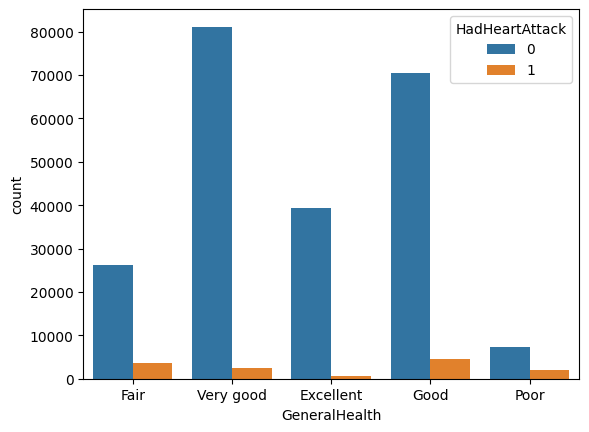

In [ ]:
sns.countplot(x='GeneralHealth',hue='HadHeartAttack',data=df)

<Axes: xlabel='Sex', ylabel='count'>

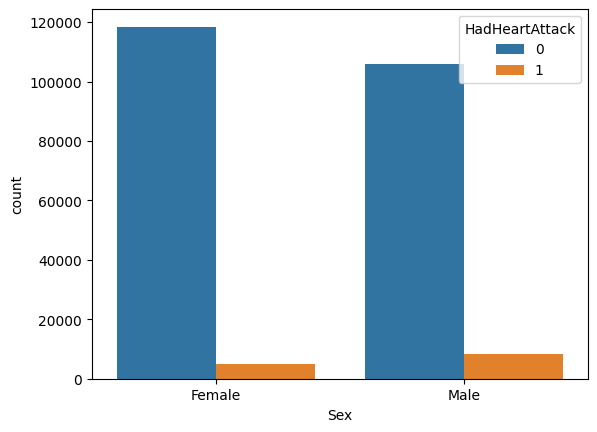

In [ ]:
sns.countplot(x='Sex',hue='HadHeartAttack',data=df)

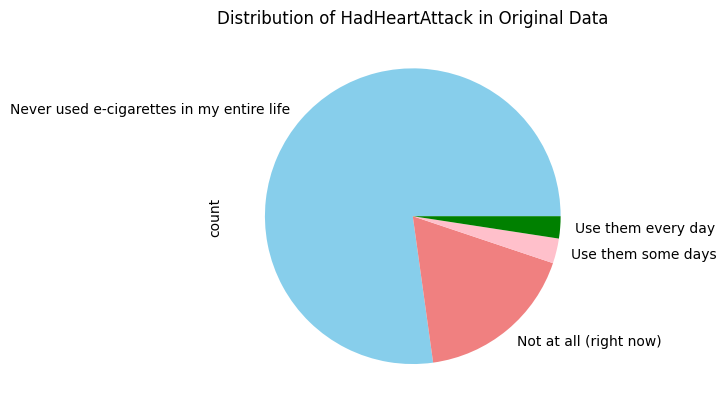

In [ ]:
df['ECigaretteUsage'].value_counts().plot.pie( colors=['skyblue', 'lightcoral','pink','green'], labels=['Never used e-cigarettes in my entire life',
       'Not at all (right now)', 'Use them some days',
       'Use them every day'])
plt.title('Distribution of HadHeartAttack in Original Data')
df['ECigaretteUsage'].value_counts()
plt.show()

<Axes: xlabel='GeneralHealth', ylabel='AgeCategory'>

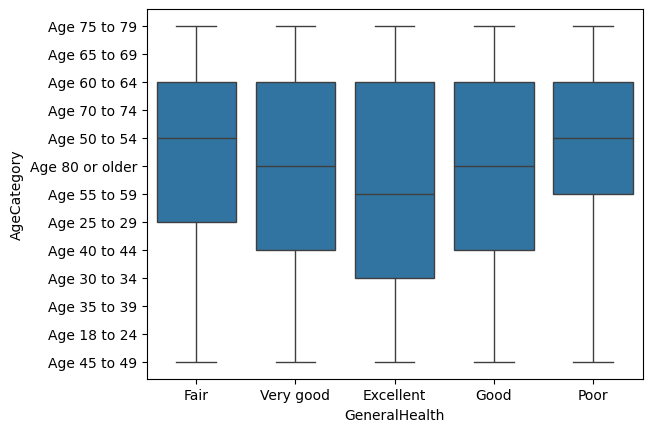

In [ ]:
sns.boxplot(x='GeneralHealth',y='AgeCategory',data=df)

#**Correlation Analysis**

In [ ]:
encoder=LabelEncoder()
df['State']=encoder.fit_transform(df['State'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['HadDiabetes']=encoder.fit_transform(df['HadDiabetes'])
df['TetanusLast10Tdap']=encoder.fit_transform(df['TetanusLast10Tdap'])
df['RaceEthnicityCategory']=encoder.fit_transform(df['RaceEthnicityCategory'])

#Encoding by using replace to create hierarchy
df['AgeCategory'].replace(['Age 18 to 24','Age 25 to 29','Age 30 to 34','Age 35 to 39', 'Age 40 to 44',
                           'Age 45 to 49', 'Age 50 to 54','Age 55 to 59', 'Age 60 to 64','Age 65 to 69',
                           'Age 70 to 74','Age 75 to 79','Age 80 or older'],[1,2,3,4,5,6,7,8,9,10,11,12,13],inplace=True)

df['SmokerStatus'].replace(['Never smoked','Former smoker',
       'Current smoker - now smokes some days','Current smoker - now smokes every day'],[1,2,3,4],inplace=True)

df['ECigaretteUsage'].replace(['Never used e-cigarettes in my entire life',
       'Not at all (right now)', 'Use them some days',
       'Use them every day' ],[1,2,3,4],inplace=True)
df['GeneralHealth'].replace(['Poor','Fair','Good','Very good','Excellent'],[1,2,3,4,5],inplace=True)


<ipython-input-25-b07464d74138>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeCategory'].replace(['Age 18 to 24','Age 25 to 29','Age 30 to 34','Age 35 to 39', 'Age 40 to 44',
<ipython-input-25-b07464d74138>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeCategory'].replace(['Age 18

In [ ]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,2,12,1.63,84.820000,32.099998,0,1,...,1,1,4,0,0,0,1,0,0,1
1,2,0,0,4,10,1.60,71.669998,27.990000,0,0,...,1,0,4,0,0,1,1,1,0,0
2,3,0,1,5,9,1.78,71.209999,22.530001,0,0,...,1,0,4,1,0,0,0,2,0,0
3,4,0,1,4,11,1.78,95.250000,30.129999,0,0,...,1,0,4,0,0,1,1,2,0,0
4,5,0,0,3,7,1.68,78.019997,27.760000,0,0,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
df['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
0,224429
1,13201


<Axes: >

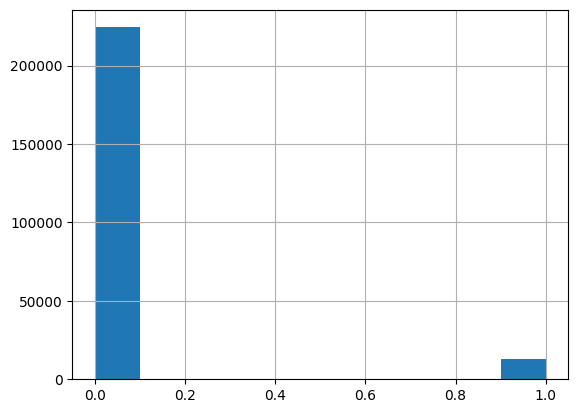

In [ ]:
df['HadHeartAttack'].hist()

In [ ]:
X=df.drop(['HadHeartAttack'],axis=1)
y=df['HadHeartAttack']

smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

df=pd.concat([X_resampled,y_resampled],axis=1)

In [ ]:
df['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
0,224429
1,224429


In [ ]:
df.corr()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,...,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
PatientID,1.000000,0.970365,0.001285,-0.006300,-0.009331,-0.009580,0.016492,0.024434,-0.004450,-0.011226,...,-0.024052,0.020612,-0.000533,0.000915,0.008649,0.001614,0.002281,-0.004684,-0.000411,-0.009742
State,0.970365,1.000000,0.003023,-0.002312,0.004113,0.004805,0.025676,0.027049,-0.001056,-0.008416,...,-0.020018,0.057600,0.005582,-0.005396,0.020211,0.018843,0.010951,-0.007753,-0.003824,-0.009716
Sex,0.001285,0.003023,1.000000,0.068638,-0.059900,0.618926,0.316740,0.007201,0.042835,-0.004242,...,0.038689,0.044321,0.123457,0.015958,-0.021692,-0.052548,0.076863,0.047020,0.011844,-0.049670
GeneralHealth,-0.006300,-0.002312,0.068638,1.000000,-0.238707,0.029104,-0.154999,-0.194718,-0.256064,-0.099245,...,-0.246083,0.070971,0.329934,0.105572,0.061961,-0.099429,0.094831,0.068834,0.140067,-0.527981
AgeCategory,-0.009331,0.004113,-0.059900,-0.238707,1.000000,-0.072045,-0.072617,-0.043834,0.202266,0.079915,...,0.225694,0.167796,-0.221909,-0.293148,0.183949,0.342399,-0.054860,-0.214432,-0.242299,0.368822
HeightInMeters,-0.009580,0.004805,0.618926,0.029104,-0.072045,1.000000,0.481153,-0.026481,0.039836,-0.022750,...,0.040544,0.099571,0.081704,0.003086,-0.048584,-0.059486,0.057805,0.030411,0.000369,0.058003
WeightInKilograms,0.016492,0.025676,0.316740,-0.154999,-0.072617,0.481153,1.000000,0.855162,0.051968,-0.006431,...,0.070531,0.002672,-0.017800,0.023635,-0.036967,-0.020747,0.039968,-0.000453,0.040377,0.074127
BMI,0.024434,0.027049,0.007201,-0.194718,-0.043834,-0.026481,0.855162,1.000000,0.036459,0.005580,...,0.057796,-0.057608,-0.068542,0.026814,-0.015497,0.009648,0.011164,-0.015690,0.045878,0.053674
HadAngina,-0.004450,-0.001056,0.042835,-0.256064,0.202266,0.039836,0.051968,0.036459,1.000000,0.060786,...,0.152504,0.046204,-0.134021,-0.081543,0.019432,0.116165,-0.031943,-0.052215,-0.084637,0.326732
HadStroke,-0.011226,-0.008416,-0.004242,-0.099245,0.079915,-0.022750,-0.006431,0.005580,0.060786,1.000000,...,0.093460,-0.012397,-0.045341,0.014717,0.018840,0.052103,0.001467,-0.008046,-0.005291,0.026913


<Axes: >

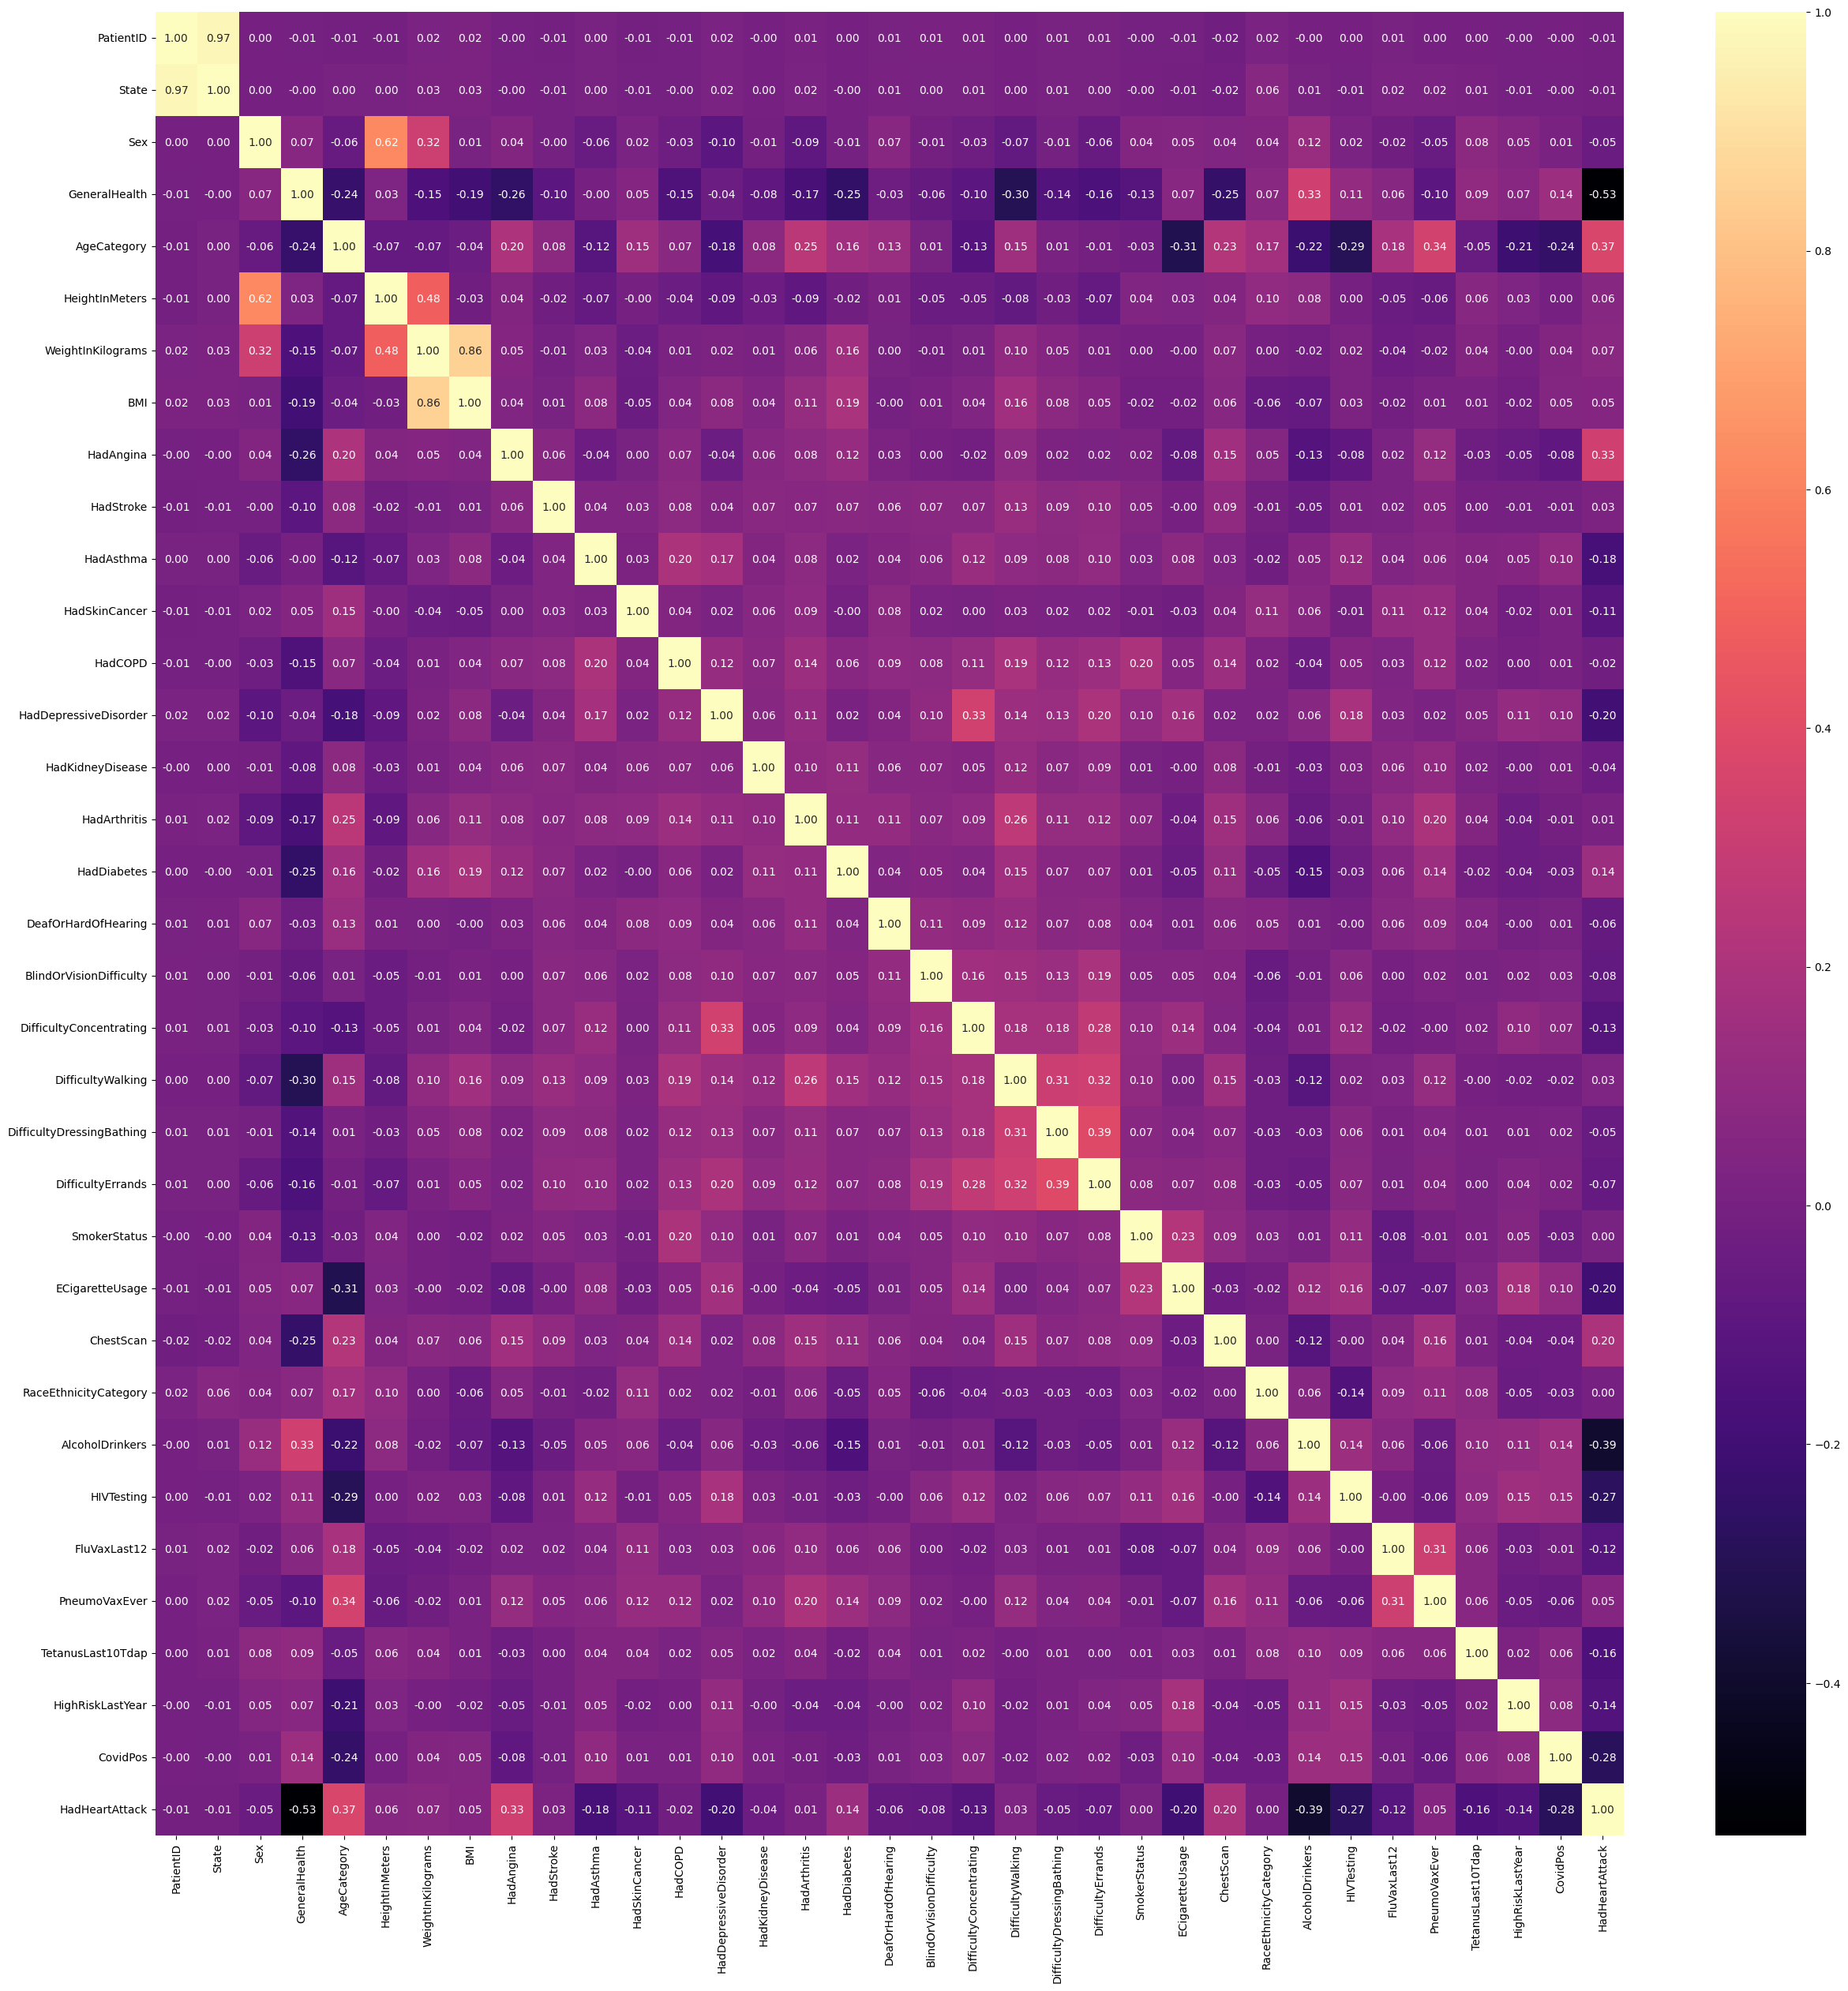

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap='magma',fmt='0.2f',annot=True)

In [ ]:
df=df.drop(['PatientID','Sex','State','HeightInMeters','WeightInKilograms',
            'BMI','HadStroke','HadAsthma','HadSkinCancer'],axis=1)

In [ ]:
df=df.drop(['HadCOPD','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing',
            'BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking'],axis=1)

In [ ]:
df=df.drop(['DifficultyDressingBathing','DifficultyErrands','SmokerStatus',
            'RaceEthnicityCategory','FluVaxLast12','PneumoVaxEver',
            'TetanusLast10Tdap','HighRiskLastYear','HadDepressiveDisorder',
            'ECigaretteUsage','ChestScan'],axis=1)

In [ ]:
df

,GeneralHealth,AgeCategory,HadAngina,AlcoholDrinkers,HIVTesting,CovidPos,HadHeartAttack
0,2,12,1,0,0,1,0
1,4,10,0,0,0,0,0
2,5,9,0,1,0,0,0
3,4,11,0,0,0,0,0
4,3,7,0,0,0,0,0
...,...,...,...,...,...,...,...
448853,2,9,0,0,0,0,1
448854,1,9,1,0,0,0,1
448855,2,8,0,0,1,0,1
448856,2,8,0,0,0,0,1


<Axes: >

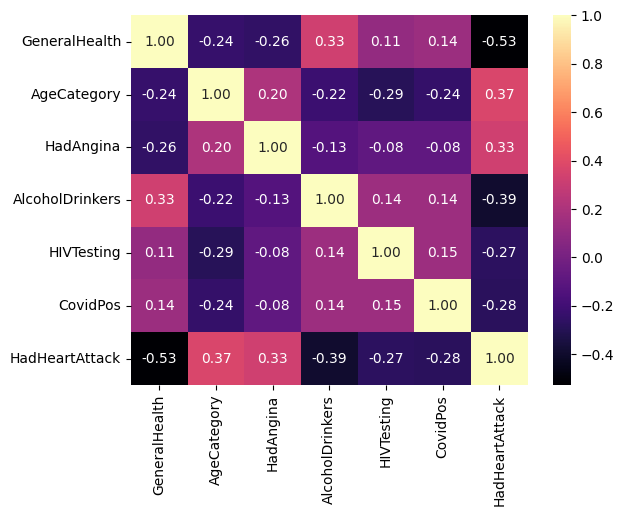

In [ ]:
new_corr=df.corr()
sns.heatmap(new_corr,fmt='0.2f',cmap='magma',annot=True)

In [ ]:
x=df.drop(['HadHeartAttack'],axis=1)
y=df['HadHeartAttack']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
model.score(xtest,ytest)

0.8273737913826137

In [ ]:
ytrain.unique()

array([0, 1])

# **Removing the Outliers**

<Axes: >

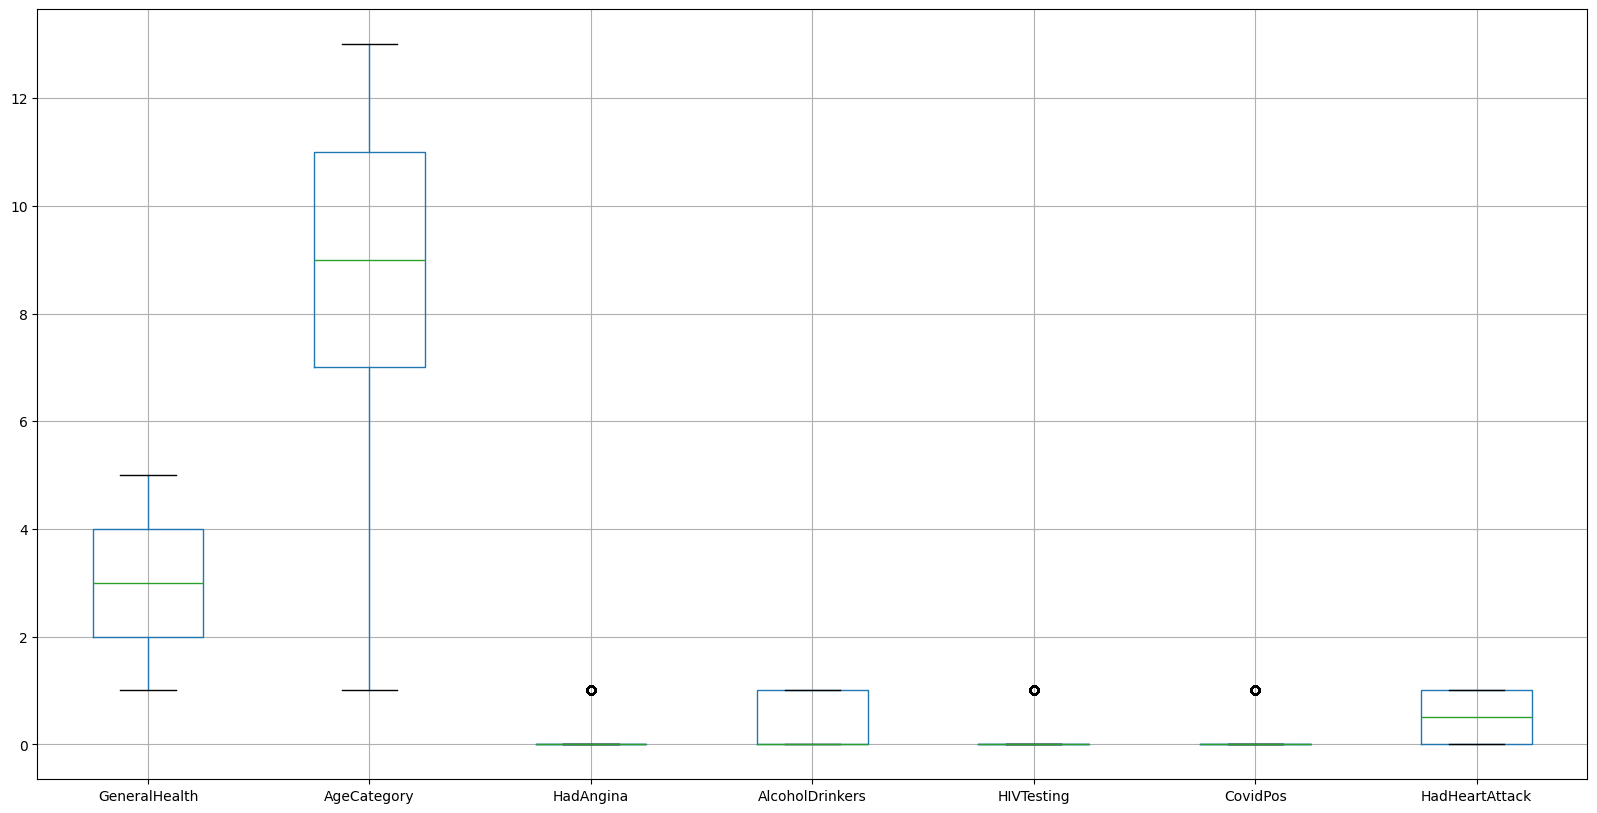

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()

**  No need of removing outliers as it makes the entire target values 0**

#**Data Scaling**

In [ ]:
X=df.drop(['HadHeartAttack'],axis=1)
Y=df['HadHeartAttack']
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
scaler.fit(X_scaled)
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
model.score(xtest,ytest)

0.8236755335739429

In [ ]:
X=df.drop(['HadHeartAttack'],axis=1)
Y=df['HadHeartAttack']
scale=StandardScaler()
X_scale=scale.fit_transform(X)

xtrain_1,xtest_1,ytrain_1,ytest_1=train_test_split(X_scale,Y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(xtrain_1,ytrain_1)
y_pred=model.predict(xtest_1)
model.score(xtest_1,ytest_1)

0.8236755335739429

In [ ]:
ytrain.unique()

array([0, 1])

# **Model Selection**

In [ ]:
from sklearn.model_selection import KFold

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

# Track best fold data
best_accuracy = 0
best_fold = -1


# Save best fold's data
best_X_train = None
best_y_train = None
best_X_test = None
best_y_test = None
best_y_pred = None

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]

    # Train model
    model.fit(xtrain,ytrain)

    # Predict
    y_pred = model.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    print(f"Fold {fold} Accuracy: {acc}")

    # Update best fold
    if acc > best_accuracy:
        best_accuracy = acc
        best_fold = fold
        best_X_train = xtrain
        best_y_train = ytrain
        best_X_test = xtest
        best_y_test = ytest
        best_y_pred = y_pred

# Output best fold details
print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 Accuracy: 0.8139843158223053
Fold 2 Accuracy: 0.8159559773648799
Fold 3 Accuracy: 0.8132157020006238
Fold 4 Accuracy: 0.8168673625112787
Fold 5 Accuracy: 0.8158870904857917

 Best Fold: 4 with Accuracy: 0.8168673625112787


Checking with other models

In [ ]:
log_model=LogisticRegression()
log_model.fit(best_X_train,best_y_train)
log_model.score(best_X_test,best_y_test)

0.8168673625112787

In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(best_X_train,best_y_train)
tree_model.score(best_X_test,best_y_test)

0.8255672767374764

In [ ]:
gauss_model=GaussianNB()
gauss_model.fit(best_X_train,best_y_train)
gauss_model.score(best_X_test,best_y_test)

0.8040347105412661

In [ ]:
forest_model=RandomForestClassifier()
forest_model.fit(best_X_train,best_y_train)
forest_model.score(best_X_test,best_y_test)

0.8255672767374764

**Chose Random Forest Classifier as it has the highest score**

In [ ]:
y_pred=forest_model.predict(best_X_test)
print(y_pred)

[0 1 0 ... 1 1 1]


#**Report**

In [ ]:
report=classification_report(best_y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     44793
           1       0.81      0.85      0.83     44978

    accuracy                           0.83     89771
   macro avg       0.83      0.83      0.83     89771
weighted avg       0.83      0.83      0.83     89771



The above report suggests that :



1.   The overall accuracy of the model is 83%. Its working correctly found 83% the instances in the prediction.
2.  **Class 0**: The model is less Sensitive and more precise in predicting this class.
3.  **Class 1** : This model is more Sensitive in predicting this class , giving more True Positives.
4. The model is precise in making correct predictions.



#**Storing into a Pickle File**

In [ ]:
import pickle

In [ ]:
filename='heartattack_rfmodel.pkl'
with open(filename,'wb') as file:
  pickle.dump(forest_model,file)

**Loading the pickle file**

In [ ]:
with open('heartattack_rfmodel.pkl','rb') as file:
  load_model=pickle.load(file)

In [ ]:
pred=load_model.predict(best_X_test)[0]